# Session 3 - 논리 회귀 구현하기

손실을 줄일 수 있는 모델을 찾기 전에 머신 러닝에서 가장 대표적인 기능인 분류를 해볼 것이다. 분류는 말 그대로 여러 특성 데이터들 중에서 일정한 기준에 따라 나누는 것인데 예를 들어 이 문서에서는 합격자와 불합격자를 점수에 따라 분류한다. 여기서는 가장 기본적인 로지스틱 회귀에 대해서 살펴볼 것이다.

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

## 데이터 추출하기

In [6]:
dataset = pd.read_csv('student_score.csv')
dataset.describe()

,Time,Score,Pass
count,100.000000,100.000000,100.000000
mean,11.850460,47.912850,0.380000
std,6.794077,28.934828,0.487832
min,0.310000,0.688000,0.000000
25%,6.972500,25.450000,0.000000
50%,12.200000,45.500000,0.000000
75%,16.500000,69.125000,1.000000
max,24.900000,112.000000,1.000000


In [7]:
x = dataset.iloc[:, [0, 1]].values
y = dataset.iloc[:, 2]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## 논리 모델 학습시키기

In [8]:
logic_reg = LogisticRegression()
logic_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 테스트 데이터로 검증하기

In [14]:
pred = logic_reg.predict(x_test)
print(pred == y_test)

67     True
3      True
65     True
7      True
48     True
1      True
44     True
80     True
21     True
39     True
13    False
56     True
91     True
19     True
32     True
78     True
8      True
37     True
58     True
57     True
Name: Pass, dtype: bool


아쉽게도 한 특성에서 빗나갔지만 손실이 거의 없는 완벽한 모델임을 알 수 있다.

## 시각화하기

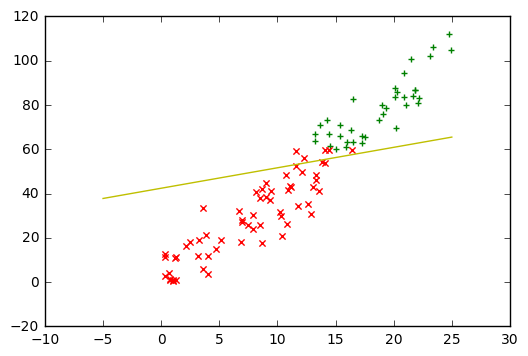

In [18]:
test = y[:] > 0
test = test.to_dict()

_pass = [x for x in test if test[x] == True]
_fail = [x for x in test if test[x] == False]

w = logic_reg.coef_[0]
a = -w[0] / w[1]
x_boundary = np.linspace(-5, 25)
y_boundary = a * x_boundary - (logic_reg.intercept_[0]) / w[1]

%matplotlib inline
plt.scatter(x[_pass, 0], x[_pass, 1], c="g", marker="+")
plt.scatter(x[_fail, 0], x[_fail, 1], c="r", marker="x")
plt.plot(x_boundary, y_boundary, 'y-')
plt.show()

이와 같이 로지스틱 회귀에서 다음과 같이 분류하였음을 알 수 있다. 비록 일부 불합격자를 잘못 분류하였으나 앞으로의 다른 검증 데이터를 통해 학습을 해야 하므로 과대적합을 막은 일반화된 모델이라고 분석할 수 있다.